## Example Python Notebook for reading in, organizing, and visualizing data 

In [22]:
# first we read in the required packages - make sure you have these installed!
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [21]:
# for this example I am going to be plotting the lengths of satellite annotations in the reference CHM13 
# this is the name of the file I'm going to read in - make sure it is in your working directory, if not you need to provide the full path to the file

centromere_satellites = "chm13v2.0.labels.cenSat.bed"

# now we read in the data into a pandas dataframe
chm13_cenSat = pd.read_csv(centromere_satellites, sep="\t", header=None)

# now let's create the headers for our dataframe 
chm13_cenSat.columns = ["chrom", "start", "end", "name", "score", "strand", "start2", "end2", "color"]

# now we inspect the dataframe to make sure that worked correctly 
print(chm13_cenSat.head())


  chrom     start       end                                       name  score  \
0  chr1      2709      4401                                 gSat(TAR1)      0   
1  chr1    215285    220569                                      HSat3      0   
2  chr1  12610489  12611903                               gSat(GSATII)      0   
3  chr1  12652636  12654050                               gSat(GSATII)      0   
4  chr1  22401566  22403350  cenSat(COMP-subunit_ACRO_rnd-5_family-38)      0   

  strand    start2      end2        color  
0      .      2709      4401   172,51,199  
1      .    215285    220569  120,161,187  
2      .  12610489  12611903   172,51,199  
3      .  12652636  12654050   172,51,199  
4      .  22401566  22403350    0,204,204  


In [10]:
# now let's calculate the length of each element in the dataframe and check that it worked by looking at the dataframe again 

chm13_cenSat['Length'] = chm13_cenSat['end'] - chm13_cenSat['start']
print(chm13_cenSat.head())

# now I want to modify the categories in the name column to make a new column containing the satellite type 

chm13_cenSat['Sat_Type'] = chm13_cenSat['name'].str.split("(").str[0]
print(chm13_cenSat.head())



  chrom     start       end                                       name  score  \
0  chr1      2709      4401                                 gSat(TAR1)      0   
1  chr1    215285    220569                                      HSat3      0   
2  chr1  12610489  12611903                               gSat(GSATII)      0   
3  chr1  12652636  12654050                               gSat(GSATII)      0   
4  chr1  22401566  22403350  cenSat(COMP-subunit_ACRO_rnd-5_family-38)      0   

  strand    start2      end2        color  Length  
0      .      2709      4401   172,51,199    1692  
1      .    215285    220569  120,161,187    5284  
2      .  12610489  12611903   172,51,199    1414  
3      .  12652636  12654050   172,51,199    1414  
4      .  22401566  22403350    0,204,204    1784  
  chrom     start       end                                       name  score  \
0  chr1      2709      4401                                 gSat(TAR1)      0   
1  chr1    215285    220569            

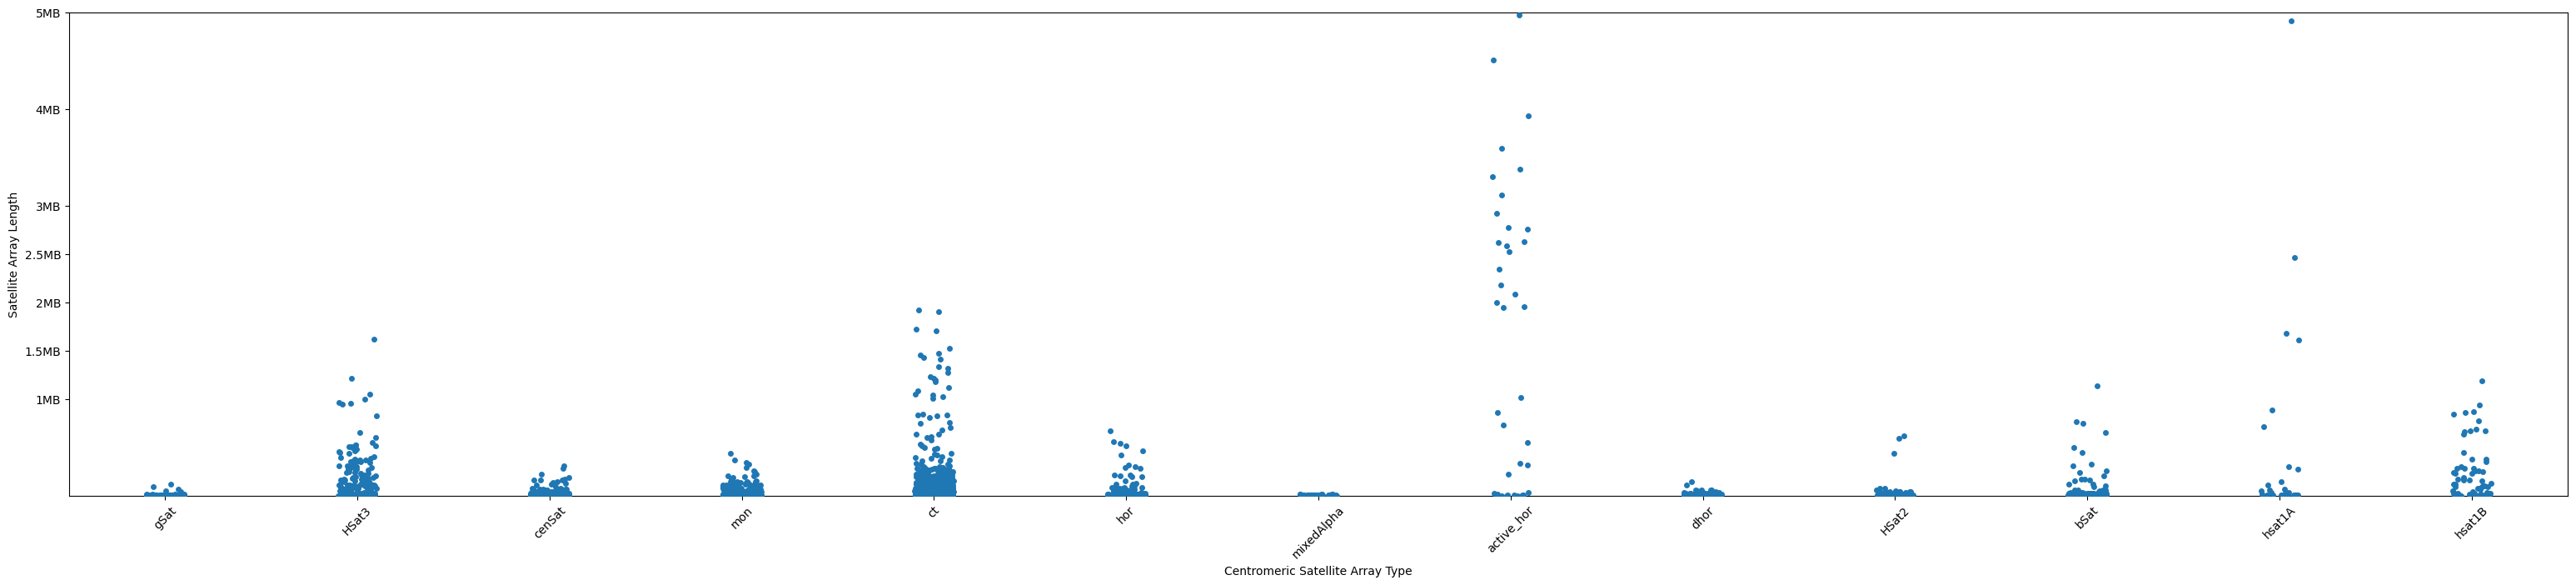

In [19]:
# now let's create a dot plot that shows the length of each type of satellite

# create the figure object 
plt.figure(figsize=(40,10))

# plot the data - we are using a seaborn stripplot here 
sns.stripplot(data=chm13_cenSat, x='Sat_Type', y='Length')

# now let's configure the different aspects of the plot 

y_ticks = [1000000, 1500000, 2000000, 2500000, 3000000, 4000000, 5000000]
y_labels = ["1MB", "1.5MB", "2MB", "2.5MB", "3MB", "4MB", "5MB"]

plt.xticks(rotation=45)
plt.ylabel("Satellite Array Length")
plt.ylim((0,5000000))
plt.yticks(y_ticks, y_labels)
plt.xlabel("Centromeric Satellite Array Type")
plt.subplots_adjust(left=0.05, bottom=0.3, right=0.8)


# show the actual plot 
plt.show()